# Flow Analysis of Different Devices
This notebook shows the use of `FlowAnalyzer`, a simple package that parses JSON-formatted network captures created with tshark. Only TCP flows have been considered thus far. The package has the ability to aggregate and display information at the packet and flow level. Examples of its use are below, for different devices.

In [1]:
import json
from FlowAnalysis import FlowAnalyzer, StatsSerializer
from matplotlib import pyplot as plt
from matplotlib import ticker

## IDevices Dimmer Switch
In all of the statistics and graphs below, the address 192.168.42.67 is the smart switch, while 192.168.42.62 is the address of the device that controlled the switch with the corresponding mobile app.

#### Capability 1: On/Off Operations
The `FormalOnOff` capture involved connecting to the switch and turning it on and off a number of times at regular intervals. This process was repeated twice, hence two flows.

<Flow (192.168.42.62:33247 <--> 192.168.42.67:50008) of 106 packets; Open: False>


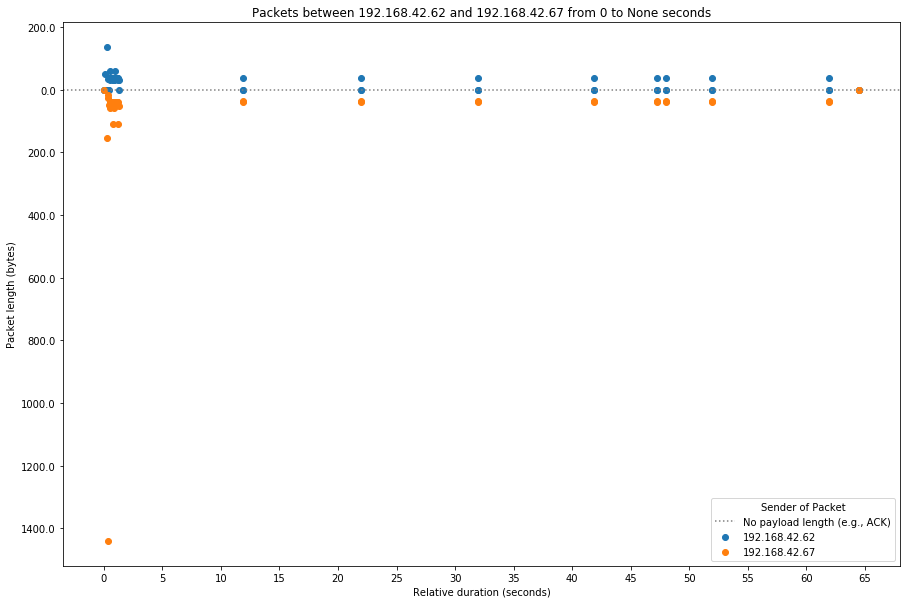

<Flow (192.168.42.62:33259 <--> 192.168.42.67:50008) of 128 packets; Open: False>


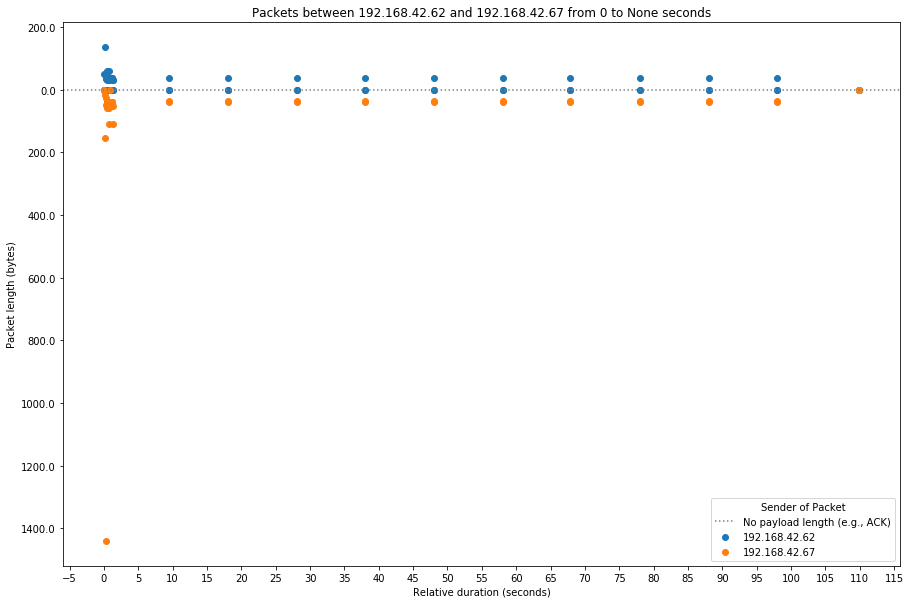

In [2]:
on_off_fa = FlowAnalyzer('../captures/switches/IDevicesDimmer/json/FormalOnOff.json')
for flow in on_off_fa.tcp_flows:
    fig, ax = flow.get_packets_graph(draw_highlights=False)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    print(flow)
    plt.show()

##### Understanding the normal on/off operations
There are two distinct sections to these flows for this device, the first being the "handshake" between the app and the switch when the app is first opened, which we may "zoom in on" by limiting our window to only the first part of the experiment:

<Flow (192.168.42.62:33247 <--> 192.168.42.67:50008) of 106 packets; Open: False>


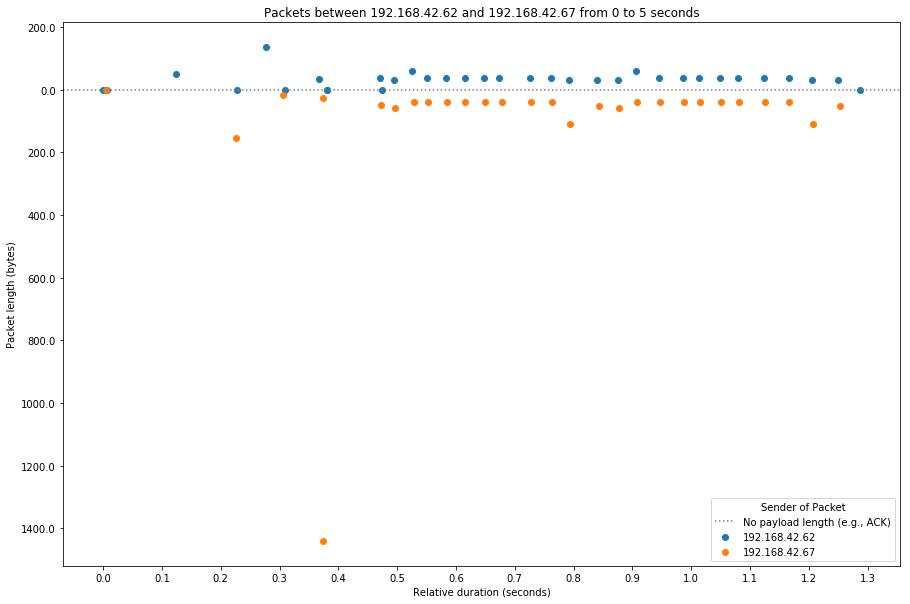

In [3]:
flow = on_off_fa.tcp_flows[0]
print(flow)
fig, ax = flow.get_packets_graph(duration_start=0, duration_end=5, draw_highlights=False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()

Accordingly, we can take a closer look at one of the on/off operations as well. Note the drastic difference in the length of packets as compared to the "handshake":

<Flow (192.168.42.62:33247 <--> 192.168.42.67:50008) of 106 packets; Open: False>


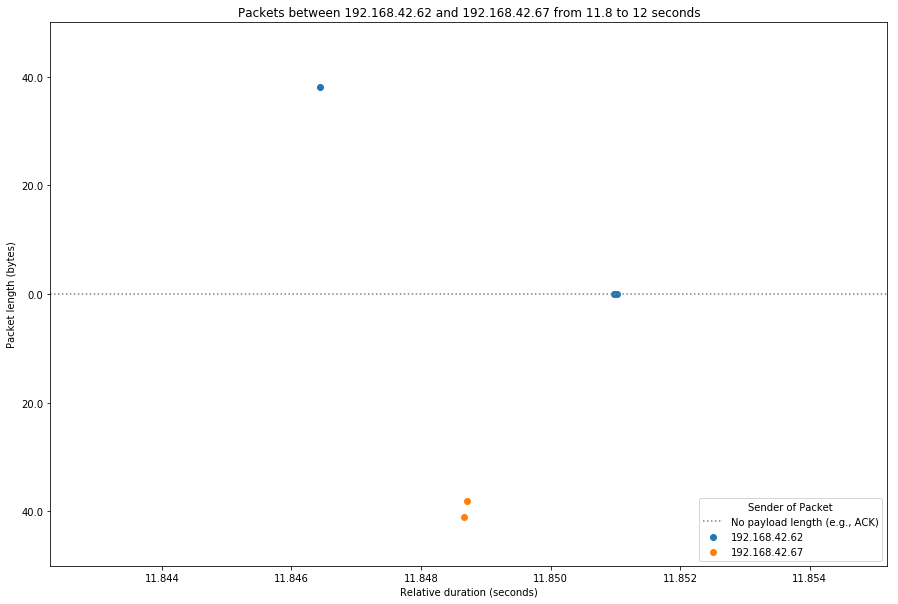

In [4]:
print(flow)
fig, ax = flow.get_packets_graph(duration_start=11.8, duration_end=12, draw_highlights=False)
ax.set_ylim(-50, 50)
plt.show()

#### Capability 2: Dimming Operations
The mobile app can be used to set the dim level on the switch. The interface is in the form of a slider. The following capture represents an experiment in which that slider was moved all the way from one position to the other over the course of 5 seconds.

<Flow (192.168.42.57:60498 <--> 192.168.42.62:50008) of 699 packets; Open: False>


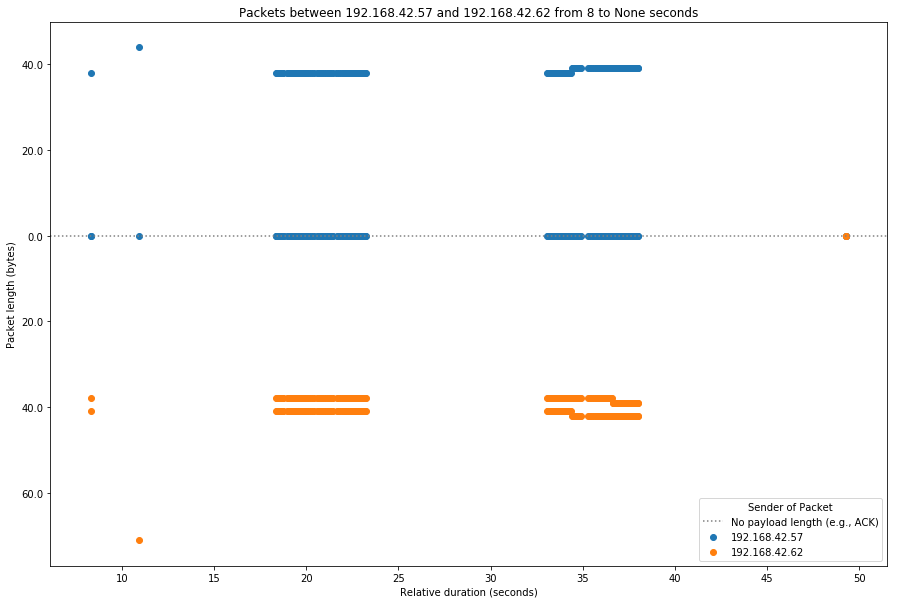

In [5]:
dim_fa = FlowAnalyzer('../captures/switches/IDevicesDimmer/json/DimSlider.json')
for f in dim_fa.tcp_flows:
    print(f)
    fig, ax = f.get_packets_graph(duration_start=8, draw_highlights=False)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    plt.show()

These patterns are somewhat similar to the on/off operations, but simply happen more frequently as the slider is moved in a continuous fashion.

#### Capability 3: Firmware Update
Perhaps the most striking contrast to all other operations of the applicaiton in terms of network behavior is the firmware update operation, when the mobile app initializes a firmware update, downloads and sends the update package to be installed on the switch.

The most interesting detail to note here is that the device that runs the mobile app is responsible for actually downloading the data and sending it to the switch, meaning that the switch sends short packets in comparison.

In this experiment, the firmware update took place in the first flow, and more on/off operations to check functionality took place in the second flow that started once the update had completed.

<Flow (192.168.42.57:60461 <--> 192.168.42.62:50008) of 1997 packets; Open: False>


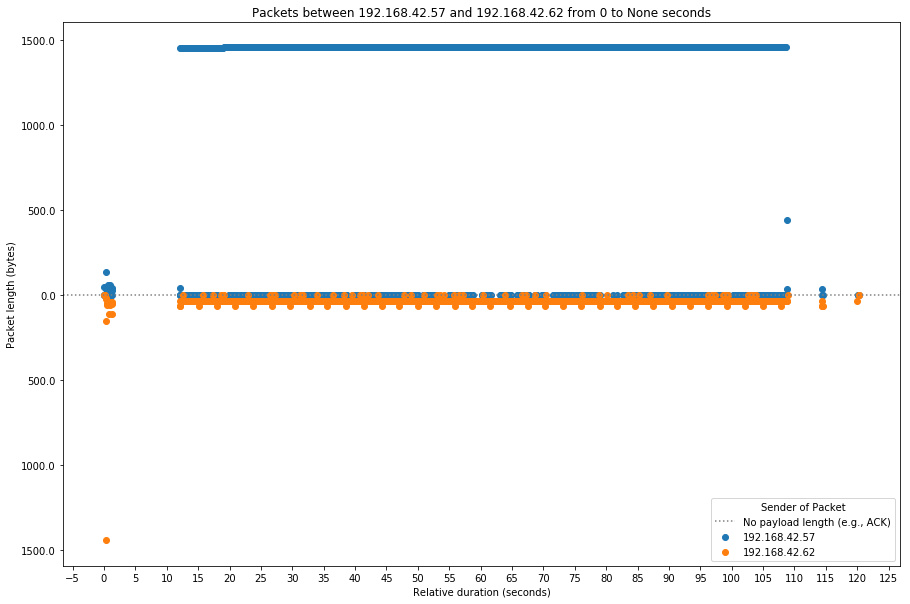

<Flow (192.168.42.57:60467 <--> 192.168.42.62:50008) of 55 packets; Open: True>


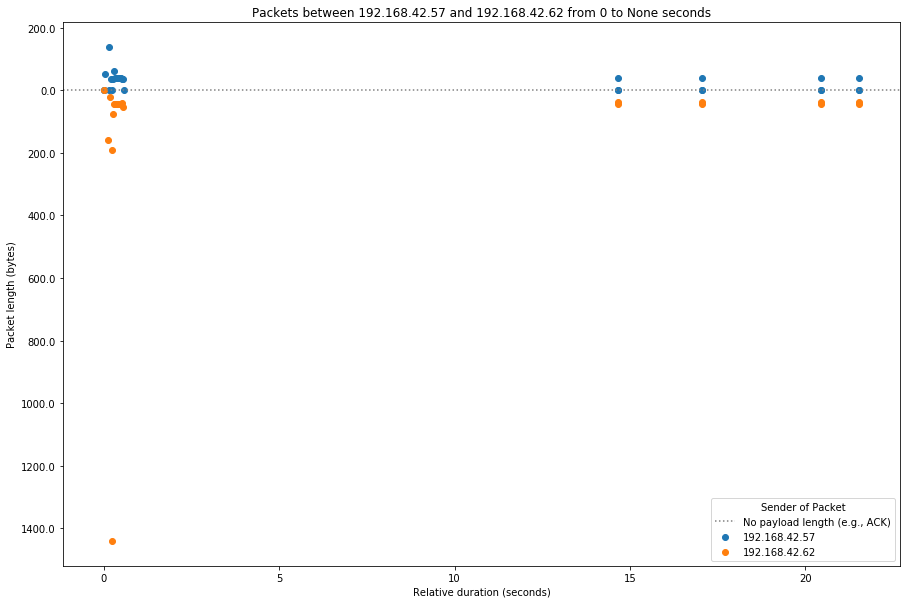

In [6]:
firm_fa = FlowAnalyzer('../captures/switches/IDevicesDimmer/json/FirmwareUpdate.json')
for f in firm_fa.tcp_flows:
    print(f)
    fig, ax = f.get_packets_graph(draw_highlights=False)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    plt.show()

#### Capability 4: Scheduling Operations
The switch also has the ability to have scheduled operations (for example, "turn on at 6PM on Wednesdays"). These schedules are programmed into the switch via the mobile app. These operations are also quite similar to the on/off operations.

<Flow (192.168.42.57:60544 <--> 192.168.42.62:50008) of 85 packets; Open: False>


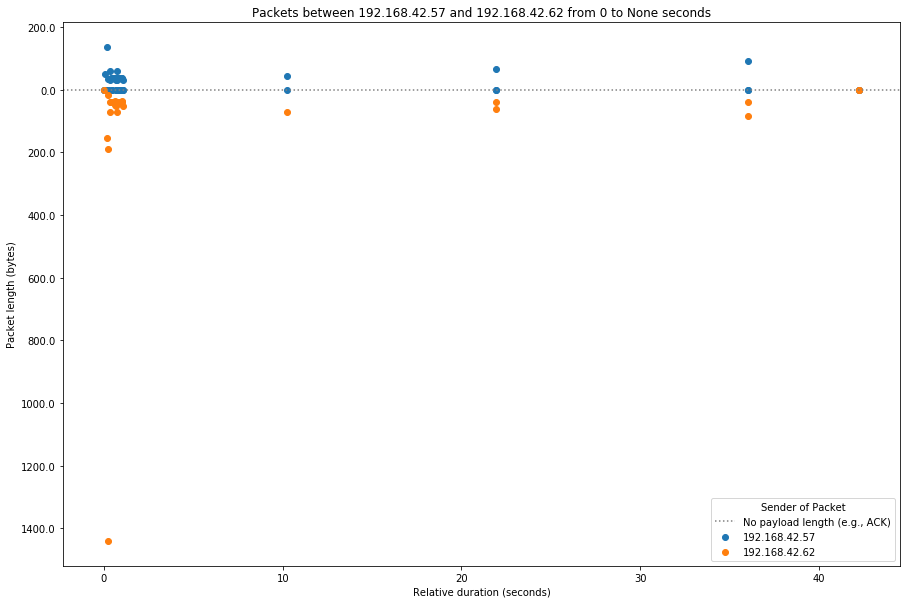

In [7]:
sched_fa = FlowAnalyzer('../captures/switches/IDevicesDimmer/json/Scheduling.json')
for f in sched_fa.tcp_flows:
    print(f)
    fig, ax = f.get_packets_graph(draw_highlights=False)
    plt.show()

## Statistics and Interactions
Additionally, the `FlowAnalysis` module offers the ability to compute aggregate statistics for a single flow, as seen below:

In [8]:
on_off_flow = on_off_fa.tcp_flows[1]
print(on_off_flow)
stats = on_off_flow.get_aggregate_stats()
print(json.dumps(stats, indent=2, cls=StatsSerializer))

<Flow (192.168.42.62:33259 <--> 192.168.42.67:50008) of 128 packets; Open: False>
{
  "mode_src_len": 38,
  "mode_dst_len": 41,
  "avg_src_len": 39.83783783783784,
  "avg_dst_len": 76.19148936170212,
  "max_src_len": 136,
  "max_dst_len": 1440,
  "num_interactions": 12,
  "avg_interaction_duration": 0.11519992351531982,
  "max_interaction_duration": 1.3212907314300537,
  "min_interaction_duration": 0.003996849060058594,
  "total_bytes": 5055
}


In [9]:
firm_flow = firm_fa.tcp_flows[0]
print(firm_flow)
stats = firm_flow.get_aggregate_stats()
print(json.dumps(stats, indent=2, cls=StatsSerializer))

<Flow (192.168.42.57:60461 <--> 192.168.42.62:50008) of 1997 packets; Open: False>
{
  "mode_src_len": 1460,
  "mode_dst_len": 38,
  "avg_src_len": 1396.0856313497823,
  "avg_dst_len": 41.47317744154058,
  "max_src_len": 1460,
  "max_dst_len": 1440,
  "num_interactions": 4,
  "avg_interaction_duration": 24.677014708518982,
  "max_interaction_duration": 96.93812561035156,
  "min_interaction_duration": 0.1993868350982666,
  "total_bytes": 992054
}


Note the concept of "interactions" here. For the purposes of this work, we consider an interaction to be a stream or "burst" of packets that generally corresponds to a single action. The scatter plots above are drawn with these periods of interaction highlighted by default.

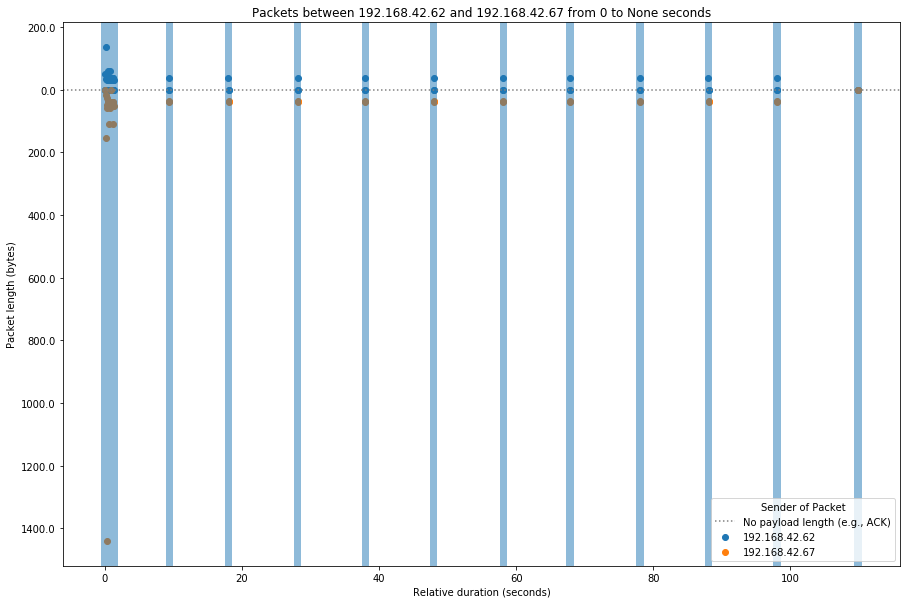

In [10]:
on_off_flow.get_packets_graph()
plt.show()

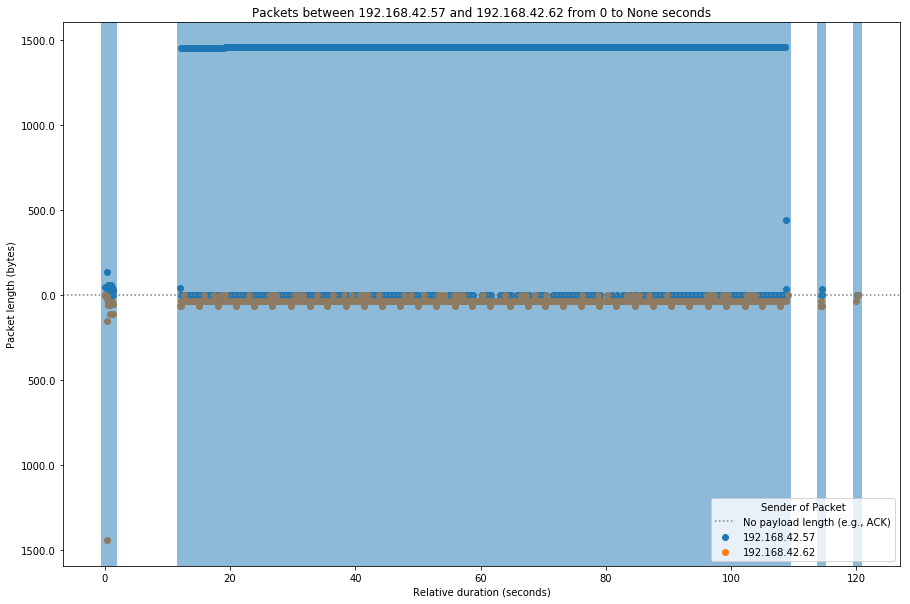

In [11]:
firm_flow.get_packets_graph()
plt.show()

## What Might a Policy Look Like?